In [1]:
library(ISLR)
names(Hitters)
dim(Hitters)
sum(is.na(Hitters$Salary))
Hitters=na.omit(Hitters)
dim(Hitters)
sum(is.na(Hitters))

[1] "AtBat"     "Hits"      "HmRun"     "Runs"      "RBI"       "Walks"    
 [7] "Years"     "CAtBat"    "CHits"     "CHmRun"    "CRuns"     "CRBI"     
[13] "CWalks"    "League"    "Division"  "PutOuts"   "Assists"   "Errors"   
[19] "Salary"    "NewLeague"

[1] 322  20

[1] 59

[1] 263  20

[1] 0

In [2]:
library(leaps)
regfit.full=regsubsets(Salary~.,Hitters)
summary(regfit.full)

Subset selection object
Call: regsubsets.formula(Salary ~ ., Hitters)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 ) " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 ) " "   "*"  " "   " "  " " " "   

In [3]:
regfit.full=regsubsets(Salary~.,data=Hitters,nvmax=19)
reg.summary=summary(regfit.full)
names(reg.summary)
reg.summary$rsq

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

[1] 0.3214501 0.4252237 0.4514294 0.4754067 0.4908036 0.5087146 0.5141227
 [8] 0.5285569 0.5346124 0.5404950 0.5426153 0.5436302 0.5444570 0.5452164
[15] 0.5454692 0.5457656 0.5459518 0.5460945 0.5461159

[1] 11

[1] 10

[1] 6

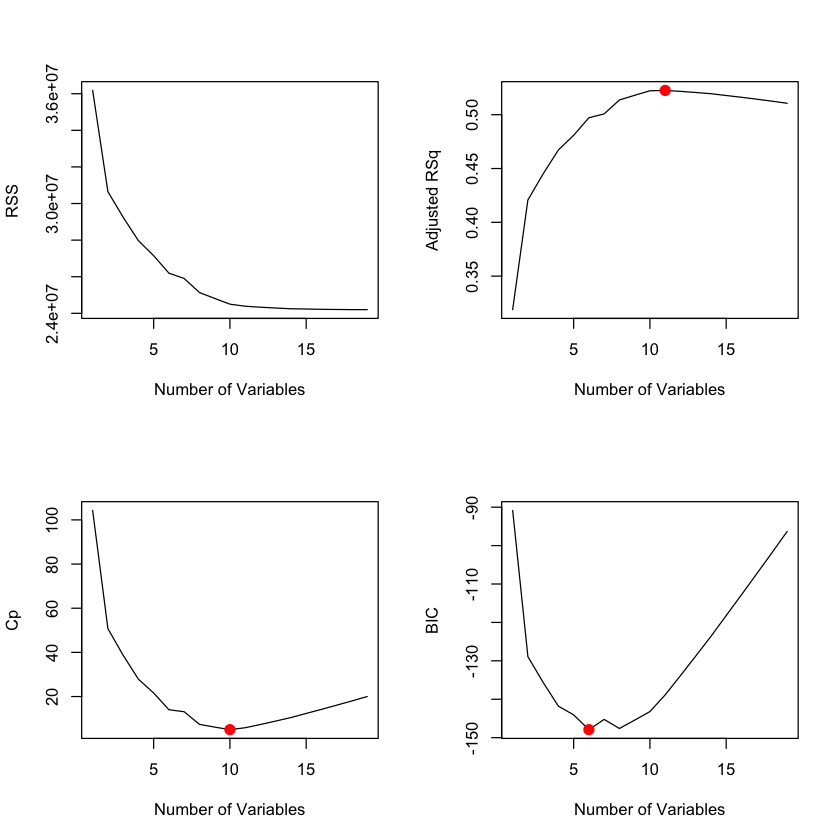

In [4]:
par(mfrow=c(2,2))
plot(reg.summary$rss,xlab="Number of Variables",ylab="RSS",type="l")
plot(reg.summary$adjr2,xlab="Number of Variables",ylab="Adjusted RSq",type="l")
which.max(reg.summary$adjr2)
points(11,reg.summary$adjr2[11], col="red",cex=2,pch=20)
plot(reg.summary$cp,xlab="Number of Variables",ylab="Cp",type='l')
which.min(reg.summary$cp)
points(10,reg.summary$cp[10],col="red",cex=2,pch=20)
which.min(reg.summary$bic)
plot(reg.summary$bic,xlab="Number of Variables",ylab="BIC",type='l')
points(6,reg.summary$bic[6],col="red",cex=2,pch=20)

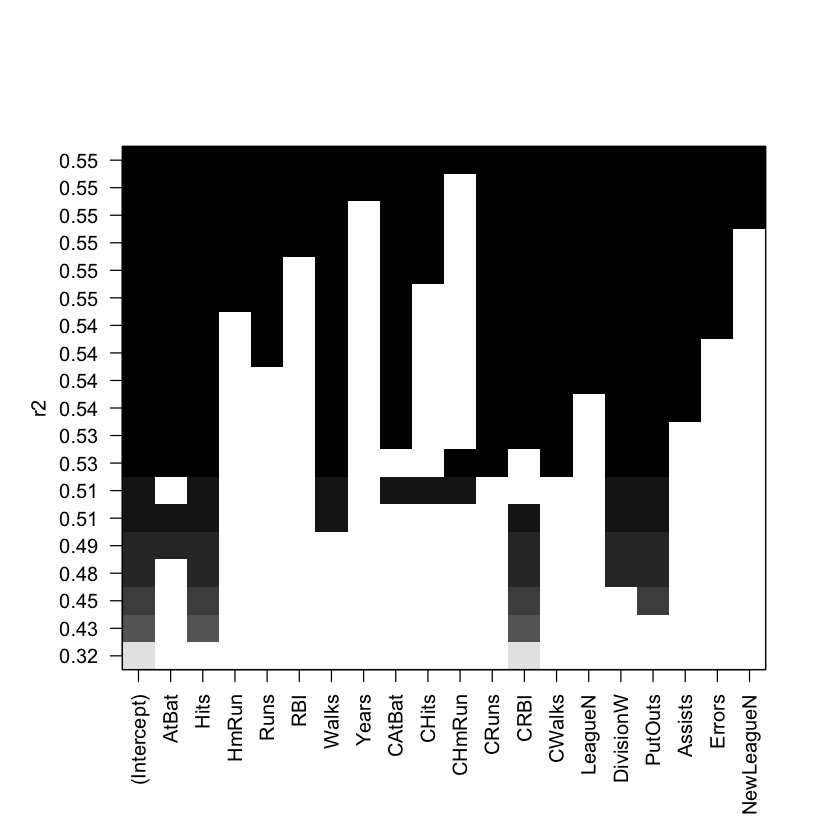

In [5]:
plot(regfit.full,scale="r2")

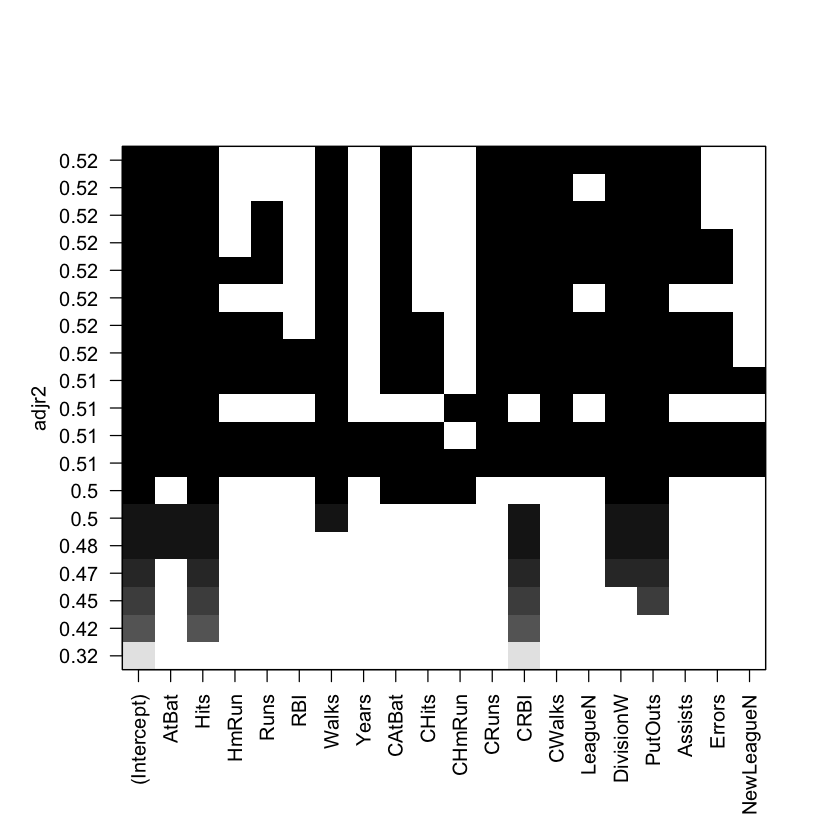

In [6]:
plot(regfit.full,scale="adjr2")

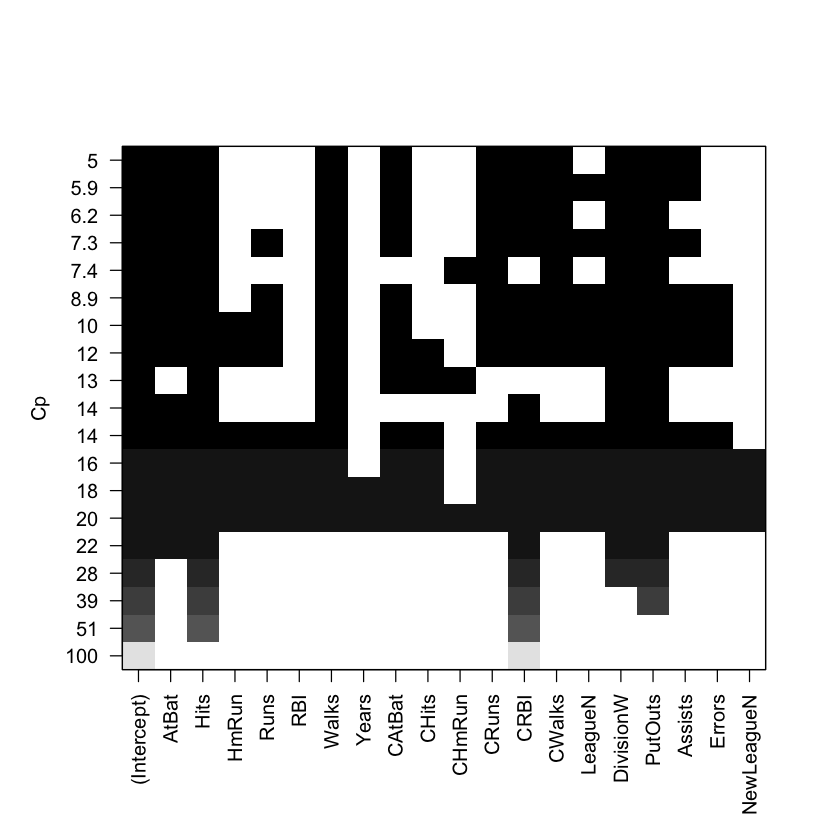

In [7]:
plot(regfit.full,scale="Cp")

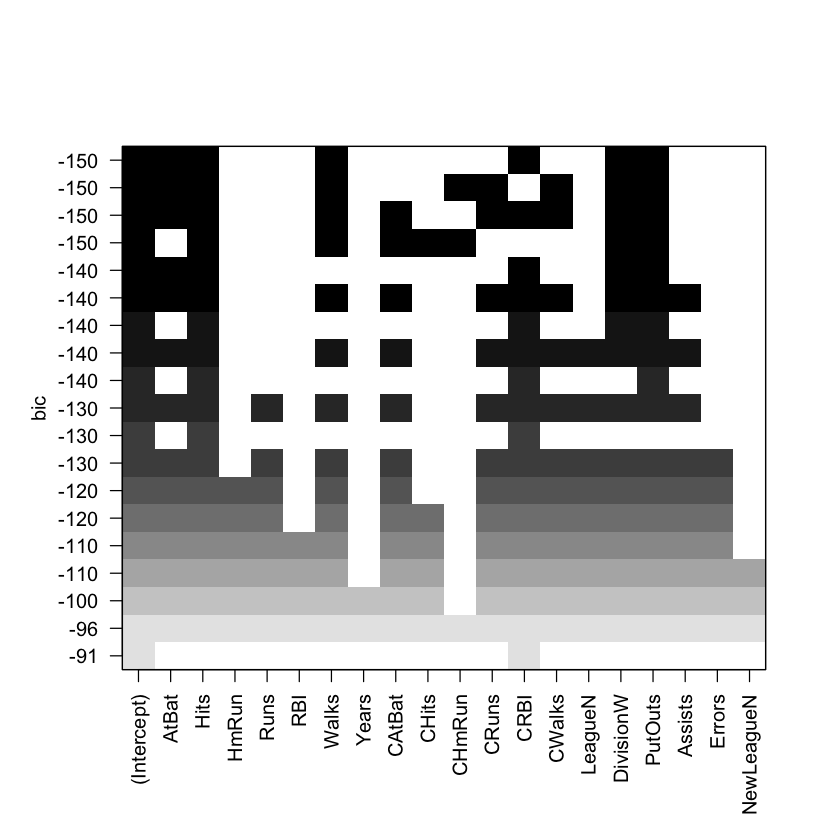

In [8]:
plot(regfit.full,scale="bic")

In [9]:
coef(regfit.full,6)

(Intercept)        AtBat         Hits        Walks         CRBI    DivisionW 
  91.5117981   -1.8685892    7.6043976    3.6976468    0.6430169 -122.9515338 
     PutOuts 
   0.2643076

In [10]:
# Forward and Backward Stepwise Selection

regfit.fwd=regsubsets(Salary~.,data=Hitters,nvmax=19,method="forward")
summary(regfit.fwd)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19, method = "forward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: forward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2 

In [11]:
regfit.bwd=regsubsets(Salary~.,data=Hitters,nvmax=19,method="backward")
summary(regfit.bwd)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19, method = "backward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: backward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    "*"   " " 


In [12]:
coef(regfit.full,7)

(Intercept)         Hits        Walks       CAtBat        CHits       CHmRun 
  79.4509472    1.2833513    3.2274264   -0.3752350    1.4957073    1.4420538 
   DivisionW      PutOuts 
-129.9866432    0.2366813

In [13]:
coef(regfit.fwd,7)

(Intercept)        AtBat         Hits        Walks         CRBI       CWalks 
 109.7873062   -1.9588851    7.4498772    4.9131401    0.8537622   -0.3053070 
   DivisionW      PutOuts 
-127.1223928    0.2533404

In [14]:
coef(regfit.bwd,7)

(Intercept)        AtBat         Hits        Walks        CRuns       CWalks 
 105.6487488   -1.9762838    6.7574914    6.0558691    1.1293095   -0.7163346 
   DivisionW      PutOuts 
-116.1692169    0.3028847

In [15]:
# Choosing Among Models

set.seed(1)
train=sample(c(TRUE,FALSE), nrow(Hitters),rep=TRUE)
test=(!train)
regfit.best=regsubsets(Salary~.,data=Hitters[train,],nvmax=19)
test.mat=model.matrix(Salary~.,data=Hitters[test,])
val.errors=rep(NA,19)
for(i in 1:19){
   coefi=coef(regfit.best,id=i)
   pred=test.mat[,names(coefi)]%*%coefi
   val.errors[i]=mean((Hitters$Salary[test]-pred)^2)
}
val.errors

[1] 220968.0 169157.1 178518.2 163426.1 168418.1 171270.6 162377.1 157909.3
 [9] 154055.7 148162.1 151156.4 151742.5 152214.5 157358.7 158541.4 158743.3
[17] 159972.7 159859.8 160105.6

In [16]:
which.min(val.errors)

[1] 10

In [17]:
coef(regfit.best,10)

(Intercept)       AtBat        Hits       Walks      CAtBat       CHits 
-80.2751499  -1.4683816   7.1625314   3.6430345  -0.1855698   1.1053238 
     CHmRun      CWalks     LeagueN   DivisionW     PutOuts 
  1.3844863  -0.7483170  84.5576103 -53.0289658   0.2381662

In [18]:
predict.regsubsets=function(object,newdata,id,...){
  form=as.formula(object$call[[2]])
  mat=model.matrix(form,newdata)
  coefi=coef(object,id=id)
  xvars=names(coefi)
  mat[,xvars]%*%coefi
  }
regfit.best=regsubsets(Salary~.,data=Hitters,nvmax=19)

In [19]:
coef(regfit.best,10)

(Intercept)        AtBat         Hits        Walks       CAtBat        CRuns 
 162.5354420   -2.1686501    6.9180175    5.7732246   -0.1300798    1.4082490 
        CRBI       CWalks    DivisionW      PutOuts      Assists 
   0.7743122   -0.8308264 -112.3800575    0.2973726    0.2831680

In [20]:
k=10
set.seed(1)
folds=sample(1:k,nrow(Hitters),replace=TRUE)
cv.errors=matrix(NA,k,19, dimnames=list(NULL, paste(1:19)))
for(j in 1:k){
  best.fit=regsubsets(Salary~.,data=Hitters[folds!=j,],nvmax=19)
  for(i in 1:19){
    pred=predict(best.fit,Hitters[folds==j,],id=i)
    cv.errors[j,i]=mean( (Hitters$Salary[folds==j]-pred)^2)
    }
  }
mean.cv.errors=apply(cv.errors,2,mean)
mean.cv.errors

1        2        3        4        5        6        7        8 
160093.5 140196.8 153117.0 151159.3 146841.3 138302.6 144346.2 130207.7 
       9       10       11       12       13       14       15       16 
129459.6 125334.7 125153.8 128273.5 133461.0 133974.6 131825.7 131882.8 
      17       18       19 
132750.9 133096.2 132804.7

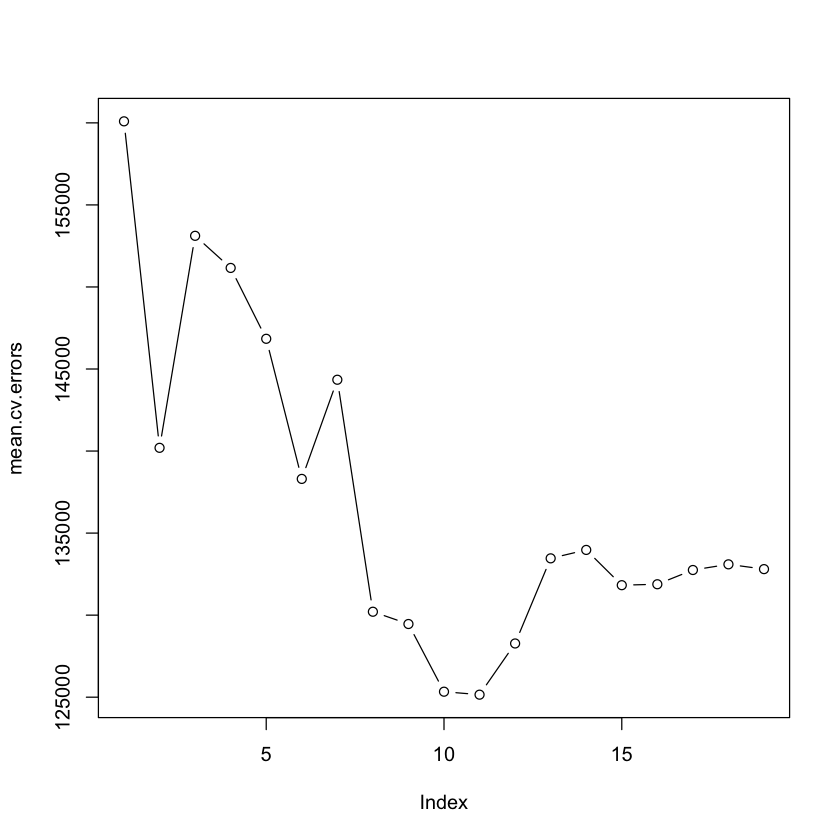

In [21]:
par(mfrow=c(1,1))
plot(mean.cv.errors,type='b')
reg.best=regsubsets(Salary~.,data=Hitters, nvmax=19)

In [22]:
coef(reg.best,11)

(Intercept)        AtBat         Hits        Walks       CAtBat        CRuns 
 135.7512195   -2.1277482    6.9236994    5.6202755   -0.1389914    1.4553310 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
   0.7852528   -0.8228559   43.1116152 -111.1460252    0.2894087    0.2688277

In [23]:
# Chapter 6 Lab 2: Ridge Regression and the Lasso

x=model.matrix(Salary~.,Hitters)[,-1]
y=Hitters$Salary

In [24]:
# Ridge Regression

library(glmnet)
grid=10^seq(10,-2,length=100)
ridge.mod=glmnet(x,y,alpha=0,lambda=grid)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-5



In [25]:
dim(coef(ridge.mod))
ridge.mod$lambda[50]

[1]  20 100

[1] 11497.57

In [26]:
coef(ridge.mod)[,50]

(Intercept)         AtBat          Hits         HmRun          Runs 
407.356050200   0.036957182   0.138180344   0.524629976   0.230701523 
          RBI         Walks         Years        CAtBat         CHits 
  0.239841459   0.289618741   1.107702929   0.003131815   0.011653637 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
  0.087545670   0.023379882   0.024138320   0.025015421   0.085028114 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
 -6.215440973   0.016482577   0.002612988  -0.020502690   0.301433531

In [27]:
sqrt(sum(coef(ridge.mod)[-1,50]^2))

[1] 6.360612

In [28]:
ridge.mod$lambda[60]

[1] 705.4802

In [29]:
coef(ridge.mod)[,60]

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 54.32519950   0.11211115   0.65622409   1.17980910   0.93769713   0.84718546 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
  1.31987948   2.59640425   0.01083413   0.04674557   0.33777318   0.09355528 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  0.09780402   0.07189612  13.68370191 -54.65877750   0.11852289   0.01606037 
      Errors   NewLeagueN 
 -0.70358655   8.61181213

In [30]:
sqrt(sum(coef(ridge.mod)[-1,60]^2))

[1] 57.11001

In [31]:
predict(ridge.mod,s=50,type="coefficients")[1:20,]

(Intercept)         AtBat          Hits         HmRun          Runs 
 4.876610e+01 -3.580999e-01  1.969359e+00 -1.278248e+00  1.145892e+00 
          RBI         Walks         Years        CAtBat         CHits 
 8.038292e-01  2.716186e+00 -6.218319e+00  5.447837e-03  1.064895e-01 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
 6.244860e-01  2.214985e-01  2.186914e-01 -1.500245e-01  4.592589e+01 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
-1.182011e+02  2.502322e-01  1.215665e-01 -3.278600e+00 -9.496680e+00

In [32]:
set.seed(1)
train=sample(1:nrow(x), nrow(x)/2)
test=(-train)
y.test=y[test]
ridge.mod=glmnet(x[train,],y[train],alpha=0,lambda=grid, thresh=1e-12)
ridge.pred=predict(ridge.mod,s=4,newx=x[test,])
mean((ridge.pred-y.test)^2)
mean((mean(y[train])-y.test)^2)

[1] 101036.8

[1] 193253.1

In [33]:
ridge.pred=predict(ridge.mod,s=1e10,newx=x[test,])
mean((ridge.pred-y.test)^2)

[1] 193253.1

In [34]:
ridge.pred=predict(ridge.mod,s=0,newx=x[test,],exact=T)
mean((ridge.pred-y.test)^2)

[1] 114783.1

In [35]:
lm(y~x, subset=train)
predict(ridge.mod,s=0,exact=T,type="coefficients")[1:20,]


Call:
lm(formula = y ~ x, subset = train)

Coefficients:
(Intercept)       xAtBat        xHits       xHmRun        xRuns         xRBI  
  299.42849     -2.54027      8.36682     11.64512     -9.09923      2.44105  
     xWalks       xYears      xCAtBat       xCHits      xCHmRun       xCRuns  
    9.23440    -22.93673     -0.18154     -0.11598     -1.33888      3.32838  
      xCRBI      xCWalks     xLeagueN   xDivisionW     xPutOuts     xAssists  
    0.07536     -1.07841     59.76065    -98.86233      0.34087      0.34165  
    xErrors  xNewLeagueN  
   -0.64207     -0.67442  


(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
299.42883596  -2.54014665   8.36611719  11.64400720  -9.09877719   2.44152119 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
  9.23403909 -22.93584442  -0.18160843  -0.11561496  -1.33836534   3.32817777 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  0.07511771  -1.07828647  59.76529059 -98.85996590   0.34086400   0.34165605 
      Errors   NewLeagueN 
 -0.64205839  -0.67606314

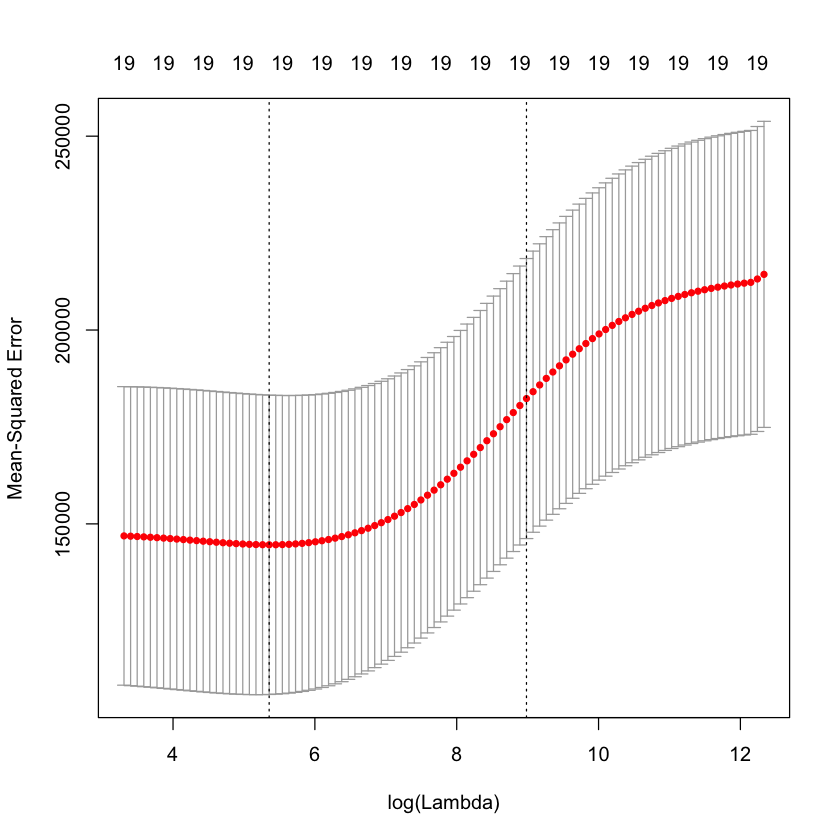

In [36]:
set.seed(1)
cv.out=cv.glmnet(x[train,],y[train],alpha=0)
plot(cv.out)

In [37]:
bestlam=cv.out$lambda.min
bestlam

[1] 211.7416

In [38]:
ridge.pred=predict(ridge.mod,s=bestlam,newx=x[test,])
mean((ridge.pred-y.test)^2)
out=glmnet(x,y,alpha=0)
predict(out,type="coefficients",s=bestlam)[1:20,]

[1] 96015.51

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
  9.88487157   0.03143991   1.00882875   0.13927624   1.11320781   0.87318990 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
  1.80410229   0.13074381   0.01113978   0.06489843   0.45158546   0.12900049 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  0.13737712   0.02908572  27.18227535 -91.63411299   0.19149252   0.04254536 
      Errors   NewLeagueN 
 -1.81244470   7.21208390

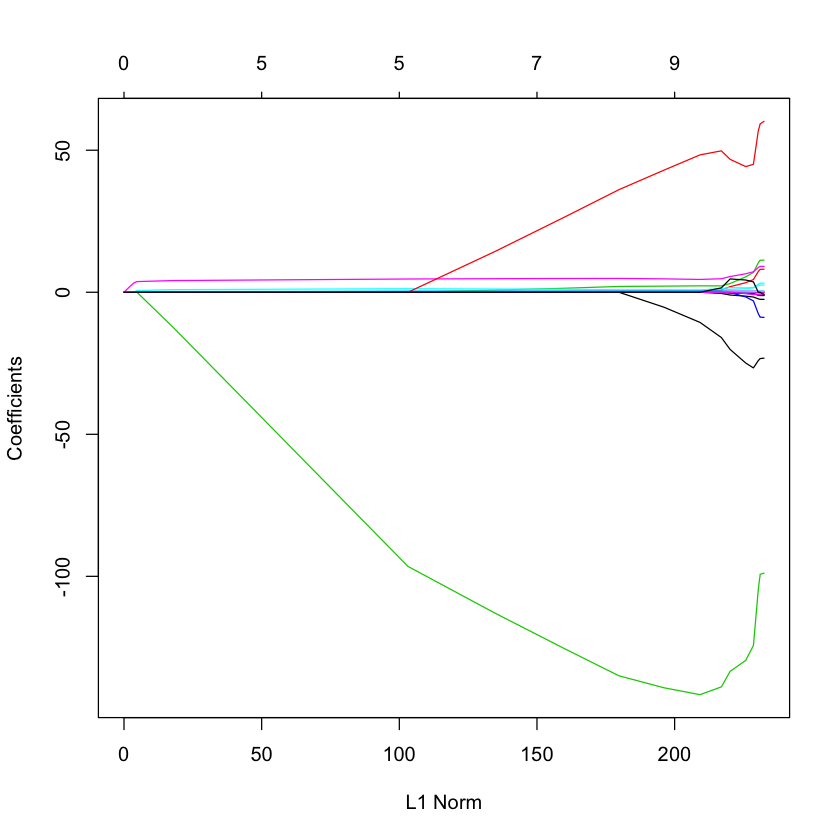

In [39]:
# The Lasso

lasso.mod=glmnet(x[train,],y[train],alpha=1,lambda=grid)
plot(lasso.mod)

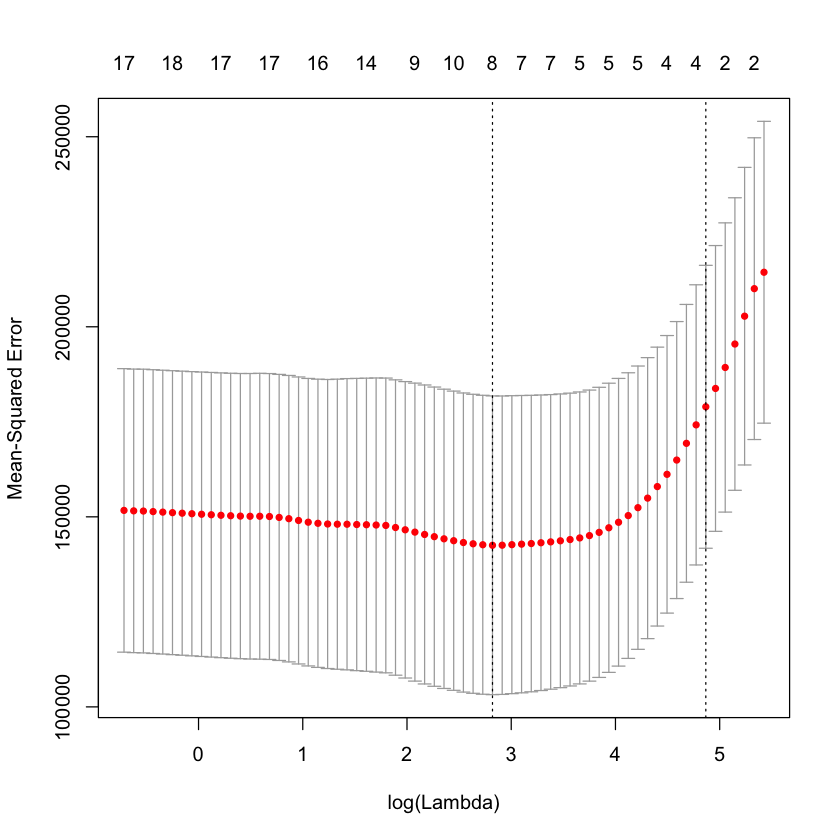

In [40]:
set.seed(1)
cv.out=cv.glmnet(x[train,],y[train],alpha=1)
plot(cv.out)

In [41]:
bestlam=cv.out$lambda.min
lasso.pred=predict(lasso.mod,s=bestlam,newx=x[test,])
mean((lasso.pred-y.test)^2)
out=glmnet(x,y,alpha=1,lambda=grid)
lasso.coef=predict(out,type="coefficients",s=bestlam)[1:20,]
lasso.coef
lasso.coef[lasso.coef!=0]

[1] 100743.4

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
  18.5394844    0.0000000    1.8735390    0.0000000    0.0000000    0.0000000 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
   2.2178444    0.0000000    0.0000000    0.0000000    0.0000000    0.2071252 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
   0.4130132    0.0000000    3.2666677 -103.4845458    0.2204284    0.0000000 
      Errors   NewLeagueN 
   0.0000000    0.0000000

(Intercept)         Hits        Walks        CRuns         CRBI      LeagueN 
  18.5394844    1.8735390    2.2178444    0.2071252    0.4130132    3.2666677 
   DivisionW      PutOuts 
-103.4845458    0.2204284

In [42]:
# Chapter 6 Lab 3: PCR and PLS Regression

# Principal Components Regression

library(pls)
set.seed(2)
pcr.fit=pcr(Salary~., data=Hitters,scale=TRUE,validation="CV")
summary(pcr.fit)


Attaching package: ‘pls’

The following object is masked from ‘package:stats’:

    loadings



Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: svdpc
Number of components considered: 19

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV             452    348.9    352.2    353.5    352.8    350.1    349.1
adjCV          452    348.7    351.8    352.9    352.1    349.3    348.0
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       349.6    350.9    352.9     353.8     355.0     356.2     363.5
adjCV    348.5    349.8    351.6     352.3     353.4     354.5     361.6
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps
CV        355.2     357.4     347.6     350.1     349.2     352.6
adjCV     352.8     355.2     345.5     347.6     346.7     349.8

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         38.31    60.16    70.84    79.03    84.29    88.63    92.26    94.96
Salary    4

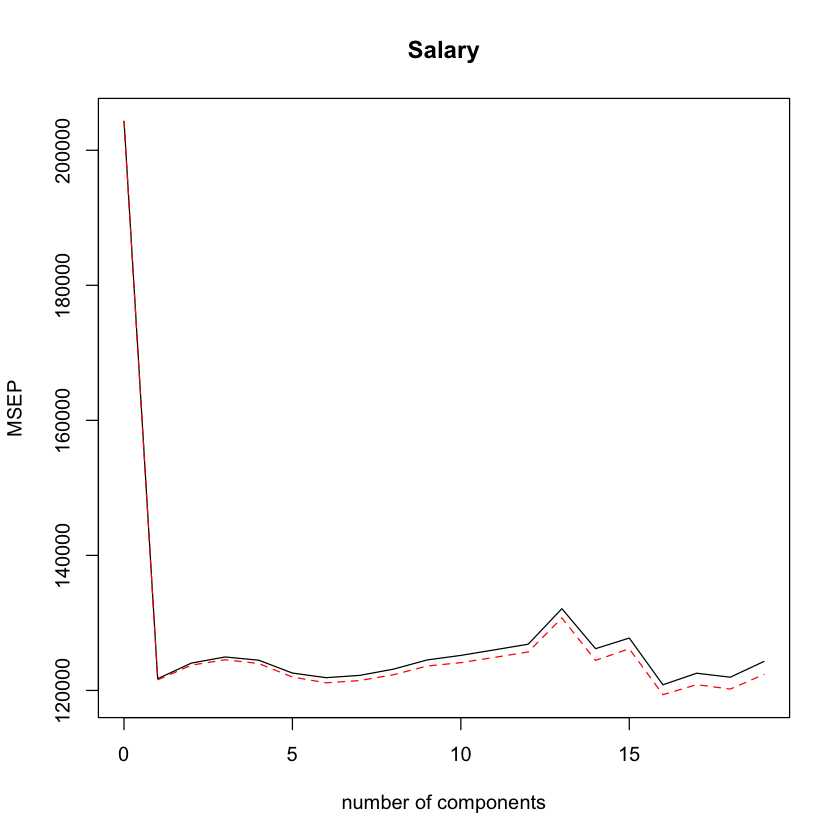

In [43]:
validationplot(pcr.fit,val.type="MSEP")

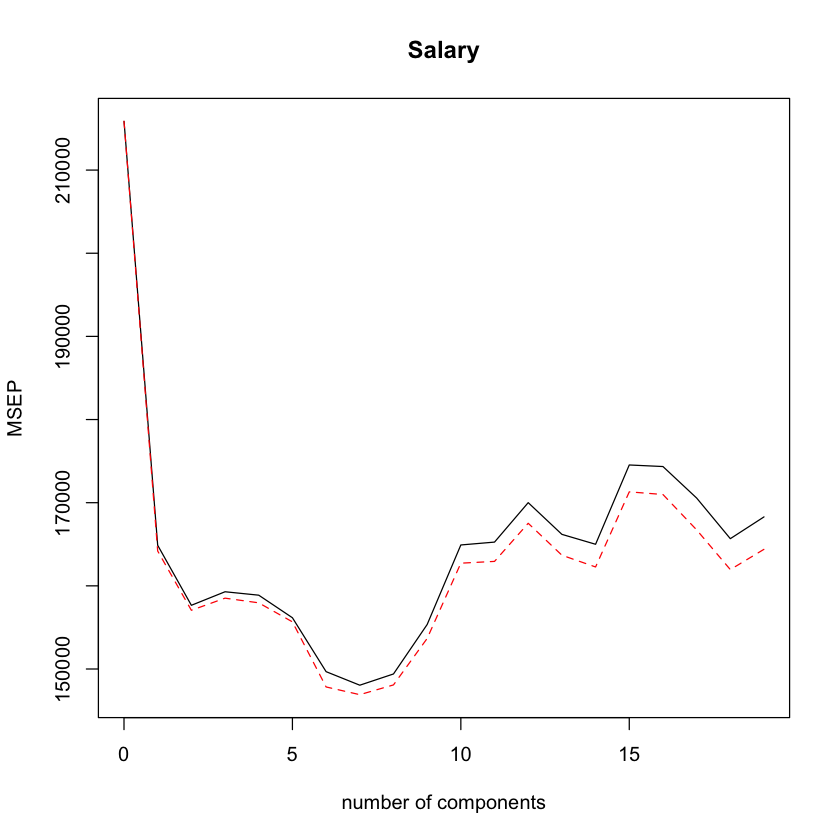

In [44]:
set.seed(1)
pcr.fit=pcr(Salary~., data=Hitters,subset=train,scale=TRUE, validation="CV")
validationplot(pcr.fit,val.type="MSEP")

In [45]:
pcr.pred=predict(pcr.fit,x[test,],ncomp=7)
mean((pcr.pred-y.test)^2)

[1] 96556.22

In [46]:
pcr.fit=pcr(y~x,scale=TRUE,ncomp=7)
summary(pcr.fit)

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: svdpc
Number of components considered: 7
TRAINING: % variance explained
   1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps
X    38.31    60.16    70.84    79.03    84.29    88.63    92.26
y    40.63    41.58    42.17    43.22    44.90    46.48    46.69
